In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape data if needed (e.g., for CNNs, you might need a channel dimension)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28, 1), Labels shape: (60000,)
Test data shape: (10000, 28, 28, 1), Labels shape: (10000,)


Subset training data shape: (100, 28, 28)
Subset training labels shape: (100,)


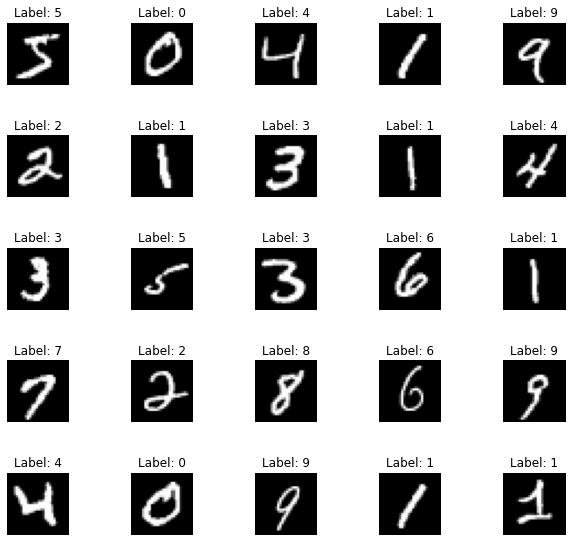

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Create a subset (first 100 images and labels)
subset_size = 100
x_train_subset = x_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Display information about the subset
print(f"Subset training data shape: {x_train_subset.shape}")
print(f"Subset training labels shape: {y_train_subset.shape}")

# Function to display a grid of images
def display_subset(images, labels, rows=5, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    axes = axes.ravel()

    for i in np.arange(0, rows*cols):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')

    plt.subplots_adjust(wspace=1)
    plt.show()

# Visualize a 5x5 grid of the subset (25 images)
display_subset(x_train_subset, y_train_subset, rows=5, cols=5)

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report

# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data for the neural network
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Build a simple convolutional neural network model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the full training set
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Get predictions on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/5
938/938 [==============================] - 29s 30ms/step - loss: 0.1775 - accuracy: 0.9486 - val_loss: 0.0586 - val_accuracy: 0.9812
Epoch 2/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.0474 - val_accuracy: 0.9846
Epoch 3/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0380 - accuracy: 0.9882 - val_loss: 0.0351 - val_accuracy: 0.9889
Epoch 4/5
938/938 [==============================] - 37s 40ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0337 - val_accuracy: 0.9897
Epoch 5/5
313/313 [==============================] - 2s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5   

In [4]:
z = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [7]:
z[1]

array([3.5652597e-08, 3.3316319e-06, 9.9999499e-01, 1.1198196e-11,
       3.0593035e-12, 4.2852972e-14, 1.7083430e-06, 2.4025339e-09,
       6.9949766e-09, 2.5672387e-13], dtype=float32)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)

# Find indices where predictions do not match the actual labels
misclassified_indices = np.where(y_pred != y_test)[0]

# Print how many misclassifications there are
print(f"Number of misclassified examples: {len(misclassified_indices)}")

# Show a subset of misclassified examples (e.g., first 10 mistakes)
subset_size = 10
misclassified_subset = misclassified_indices[:subset_size]

# Function to display misclassified images
def display_misclassified(images, true_labels, pred_labels, misclassified_indices, rows=2, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 5))
    axes = axes.ravel()

    for i in range(rows * cols):
        idx = misclassified_indices[i]
        axes[i].imshow(images[idx].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"True: {true_labels[idx]}, Pred: {pred_labels[idx]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Visualize a 2x5 grid of misclassified examples
display_misclassified(x_test, y_test, y_pred, misclassified_subset, rows=2, cols=5)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "c:\Users\Bruger\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Bruger\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Bruger\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "c:\Users\Bruger\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "c:\Users\Bruger\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Bruger\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "c:\Users\Bruger\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "c:\Users\Bruger\anaconda3\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "c:\Users\Bruger\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "c:\Users\Bruger\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "c:\Users\Bruger\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2898, in run_cell
      result = self._run_cell(
    File "c:\Users\Bruger\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2944, in _run_cell
      return runner(coro)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3169, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Bruger\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3361, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "c:\Users\Bruger\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Bruger\AppData\Local\Temp\ipykernel_20096\2096582173.py", line 5, in <module>
      y_pred = np.argmax(model.predict(x_test), axis=1)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\engine\training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\engine\training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\engine\training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
      return self(x, training=False)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\Bruger\anaconda3\lib\site-packages\keras\backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
convolution input must be 4-dimensional: [32,28,28]
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_predict_function_26175]